# Assignment 2 Project Report

<b> By Maryam Shayan, Priyanka Garg, Peiling (Sebrina) Xian, Vinh Nguyen<b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz

In [2]:
df1 = pd.read_csv('price_demand_data.csv')
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [3]:
df2 = pd.read_csv('weather_data.csv')
df2.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [4]:
# Get the dd/mm/yyyy field from SETTLEMENTDATE so we can join it with the weather

df1['Date'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021


In [5]:
# Merge the two datasets based on the date
data = df1.merge(df2, left_on='Date', right_on='Date')
data.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3


In [6]:
# Aggreate data by date to have a single entry for each day
# Use max() method to select the maximum value for each day
aggregate_data = data.groupby('Date').max()
aggregate_data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,NNE,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.0,7.4,1.6,S,...,7,N,7,1012.8,19.4,69,7.0,S,13,1011.9
1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.0,6.4,6.3,S,...,6,WSW,6,1012.3,19.7,67,6.0,S,15,1012.2
1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.0,4.4,10.8,NNW,...,1,NE,9,1024.3,28.7,30,3.0,SE,7,1021.6
1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.0,5.4,7.1,N,...,3,NNE,9,1027.3,24.2,35,7.0,N,17,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.2,6.4,7.9,S,...,5,W,13,1010.0,15.7,62,6.0,S,17,1009.6
9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.4,0.0,7.1,NW,...,6,,Calm,1018.4,19.5,45,3.0,WNW,6,1014.9
9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.0,1.6,0.5,S,...,7,SSW,4,1010.7,12.3,86,8.0,S,20,1008.8


In [7]:
# Reset "Date" as an attribute

aggregate_data.reset_index(inplace = True)
aggregate_data

,Date,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.0,7.4,1.6,...,7,N,7,1012.8,19.4,69,7.0,S,13,1011.9
2,1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.0,6.4,6.3,...,6,WSW,6,1012.3,19.7,67,6.0,S,15,1012.2
3,1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.0,4.4,10.8,...,1,NE,9,1024.3,28.7,30,3.0,SE,7,1021.6
4,1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.0,5.4,7.1,...,3,NNE,9,1027.3,24.2,35,7.0,N,17,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.2,6.4,7.9,...,5,W,13,1010.0,15.7,62,6.0,S,17,1009.6
239,9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.4,0.0,7.1,...,6,,Calm,1018.4,19.5,45,3.0,WNW,6,1014.9
240,9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.0,1.6,0.5,...,7,SSW,4,1010.7,12.3,86,8.0,S,20,1008.8
241,9/07/2021,VIC1,9/07/2021 9:30,7536.11,HIGH,2.0,12.0,NaN,1.0,9.0,...,4,NE,4,1017.9,11.0,67,2.0,SSW,7,1015.7


In [8]:
# Replace NaT value with mean value

df = aggregate_data.fillna(aggregate_data.mean())
df

,Date,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.000000,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.000000,7.4,1.6,...,7,N,7,1012.8,19.4,69,7.0,S,13,1011.9
2,1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.000000,6.4,6.3,...,6,WSW,6,1012.3,19.7,67,6.0,S,15,1012.2
3,1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.000000,4.4,10.8,...,1,NE,9,1024.3,28.7,30,3.0,SE,7,1021.6
4,1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.000000,5.4,7.1,...,3,NNE,9,1027.3,24.2,35,7.0,N,17,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.200000,6.4,7.9,...,5,W,13,1010.0,15.7,62,6.0,S,17,1009.6
239,9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.400000,0.0,7.1,...,6,,Calm,1018.4,19.5,45,3.0,WNW,6,1014.9
240,9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.000000,1.6,0.5,...,7,SSW,4,1010.7,12.3,86,8.0,S,20,1008.8
241,9/07/2021,VIC1,9/07/2021 9:30,7536.11,HIGH,2.0,12.0,1.576763,1.0,9.0,...,4,NE,4,1017.9,11.0,67,2.0,SSW,7,1015.7


In [ ]:
# Check te columns again to make sure there is no NaT value left in the columns used for the analysis 

df.isnull().sum()

In [11]:
# find Pearson coefficient 

df.corr(method='pearson')


,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
TOTALDEMAND,1.000000,-0.488244,-0.290004,-0.072715,-0.264008,-0.139581,0.081024,-0.390843,0.103267,-0.167373,0.051994,-0.325252,0.064301,0.070940,-0.005067
Minimum temperature (°C),-0.488244,1.000000,0.707525,0.043400,0.655132,0.081809,0.055599,0.915726,-0.333647,0.206491,-0.326020,0.661643,-0.055004,0.062040,-0.278155
Maximum temperature (°C),-0.290004,0.707525,1.000000,-0.124821,0.620699,0.469055,-0.056155,0.820029,-0.309292,-0.170134,-0.101655,0.965134,-0.456640,-0.238614,-0.178446
Rainfall (mm),-0.072715,0.043400,-0.124821,1.000000,-0.044562,-0.146530,0.042003,-0.020988,0.194397,0.069613,-0.138618,-0.126890,0.194560,0.111460,-0.056881
Evaporation (mm),-0.264008,0.655132,0.620699,-0.044562,1.000000,0.273256,0.158109,0.705835,-0.528364,0.014322,-0.272173,0.560214,-0.208511,-0.095795,-0.254226
Sunshine (hours),-0.139581,0.081809,0.469055,-0.146530,0.273256,1.000000,-0.058401,0.197050,-0.237637,-0.596661,0.206708,0.487546,-0.550315,-0.722233,0.132140
Speed of maximum wind gust (km/h),0.081024,0.055599,-0.056155,0.042003,0.158109,-0.058401,1.000000,0.108981,-0.392071,0.025506,-0.414805,-0.097803,-0.083759,0.135831,-0.426558
9am Temperature (°C),-0.390843,0.915726,0.820029,-0.020988,0.705835,0.197050,0.108981,1.000000,-0.467492,0.071326,-0.285478,0.761579,-0.157133,-0.003271,-0.277633
9am relative humidity (%),0.103267,-0.333647,-0.309292,0.194397,-0.528364,-0.237637,-0.392071,-0.467492,1.000000,0.063188,0.142822,-0.261353,0.402235,0.031220,0.138699
9am cloud amount (oktas),-0.167373,0.206491,-0.170134,0.069613,0.014322,-0.596661,0.025506,0.071326,0.063188,1.000000,-0.198457,-0.181595,0.424203,0.392261,-0.121681


# Model 1: Predicting the maximum daily energy usage based on the provided weather data (the energy spot price) using linear regression

In [ ]:
# Step 1: Plot the relationship between 'Total Demand for Energy Usage' and 
# some variables that we thought might have impacts on the demand for energy

In [ ]:
plt.scatter(x =df['Minimum temperature (°C)'], y = df['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('Minimum temperature')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

plt.scatter(x = df['Maximum temperature (°C)'], y = df['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('Maximum temperature')
plt.ylabel('Total Demand for Energy Usage')
plt.show()
    
plt.scatter(x = df['Rainfall (mm)'], y = df['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

plt.scatter(x = df['Sunshine (hours)'], y = df['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('Sunshine (hours)')
plt.ylabel('Total Demand for Energy Usage')
plt.show()
    
plt.scatter(x = df['9am Temperature (°C)'], y = df['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('9am Temperature (°C)')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

plt.scatter(x = df['9am relative humidity (%)'], y = df['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('9am relative humidity (%)')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

plt.scatter(x = df['3pm Temperature (°C)'], y = df['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('3pm Temperature (°C)')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

plt.scatter(x = df['3pm relative humidity (%)'], y = df['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('3pm relative humidity (%)')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

In [25]:
# select the variables that seems to have strong linear relationship with the demand for energy usage
# We tried different combinations of variables and kept the one that generated the highest R squared score 
    
Y = df['TOTALDEMAND']
X = df[['Minimum temperature (°C)', '9am Temperature (°C)', '3pm Temperature (°C)']]

In [26]:
# Step 2: Split the datasets int training and test subsets 
# Again, we tried different training and test subset ratio and random states to see the impacts on the R squared score 
# The ones below results in the highest R squared score of 0.2091

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape

(194, 3)

In [28]:
# Step 3: Train the model 
model = LinearRegression().fit(X_train, Y_train)

# predict values of y given our hidden test set
Y_pred = model.predict(X_test)

# check the MSE and R2 scores 
MSE = mean_squared_error(Y_test, Y_pred)
R2 = model.score(X_test, Y_test)
MSE, R2

(565697.4427764469, 0.209129866799055)

In [29]:
# Step 4: Find the intercept and coefficient of the prediction model 

intercept = model.intercept_
coefficient = model.coef_
intercept, coefficient

(7286.332565836174, array([-165.33791018,   76.9756102 ,  -21.82572074]))

In [33]:
# Step 5: Construct the prediction function 
 
MinTemp = X['Minimum temperature (°C)'].values
Temp_at_9am = X['9am Temperature (°C)'].values
Temp_at_3pm = X['3pm Temperature (°C)'].values

Max_Energy_Usage = 7286 - 165.338*MinTemp + 76.98*Temp_at_9am -21.825*Temp_at_3pm

In [34]:
# Step 6: Compare the predicted usage from the above function with the actual usage data 
    
Usage_comparision = pd.DataFrame(Max_Energy_Usage, columns = ['Predicted_Usage'])
Usage_comparision['Actual_Usage'] = df['TOTALDEMAND']
Usage_comparision.set_index(df['Date'], drop = False, inplace = True)

Usage_comparision

,Predicted_Usage,Actual_Usage
Date,,
1/01/2021,5571.4607,5019.64
1/02/2021,5948.0278,5228.29
1/03/2021,5852.2511,5225.37
1/04/2021,5717.9433,5807.02
1/05/2021,6053.0514,5261.09
...,...,...
9/04/2021,5831.7791,5688.63
9/05/2021,6096.3205,5222.89
9/06/2021,6474.6221,7224.91


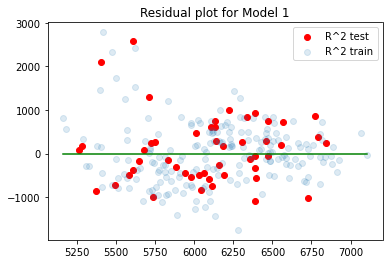

In [38]:
# Step 7: Perform residual analysis

# make predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# calculate residuals
residual_test = [true_val - estimated_val for true_val, estimated_val in zip(Y_test, y_pred_test)]
residual_train = [true_val - estimated_val for true_val, estimated_val in zip(Y_train, y_pred_train)]

# plot residuals
plt.scatter(y_pred_test, residual_test, label='R^2 test', color='red')
plt.scatter(y_pred_train, residual_train, label='R^2 train', alpha=0.15)

# plot the 0 line 
plt.plot([min(y_pred_train), max(y_pred_train)], [0,0], color='green')

plt.legend()

plt.title("Residual plot for Model 1")
plt.show()

In [39]:
# Step 8: Check the assumptions of regression by examining the residuals. Our observations are detailed in the report

# Model 2: Classification: Predicting the maximum daily price category based on the provided weather data (category of usage)

In [40]:
# Step 1: Examine target variable (i.e. price)
np.unique(df['PRICECATEGORY'])

array(['HIGH', 'LOW', 'MEDIUM'], dtype=object)

In [13]:
# convert object type target variable to the numerical type values

mapper = {'LOW': 0, 'MEDIUM': 1, 'HIGH': 2}
df['new_price_category'] = df['PRICECATEGORY'].map(mapper)
np.unique(df['new_price_category'])

array([0, 1, 2])

In [14]:
# Step 2: Select predictor variables. We used all of the attributes, except for ones that have null values 
# or have object/string type values. After trying different combinations of variables, 
# we found the 'Minimum Temperature' and '9am Temperature' combination generated the higest accuracy score

Y = df['new_price_category']
X = df[['Minimum temperature (°C)', '9am Temperature (°C)']]

In [15]:
# Step 3: Split the dataset into training and test subsets
    
X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    Y, # class label
                                                    train_size=0.7, # proportion to use for train
                                                    test_size=0.3, # proportion to use for test
                                                    random_state=42 # the random state 
                                                    )
    
X_train.head()

,Minimum temperature (°C),9am Temperature (°C)
29,7.4,12.7
120,14.7,18.3
114,17.5,18.9
241,2.0,4.6
5,5.7,9.2


In [21]:
# Step 4: Create the decision tree 
# initialise the tree

dt = DecisionTreeClassifier(criterion="entropy", # the criterion to split - we will use entropy
                            random_state = 42 , # the random state to run this at
                            max_depth = 3 # the depth of the tree
                           )

# fit it to the training dataset
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [22]:
# assign y_pred to the predictions of the decision tree given the X_test

y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [23]:
# evaluate our model using accuracy_score, which requires the true class labels and the predicted class labels

accuracy_score(y_test, y_pred)

0.8356164383561644

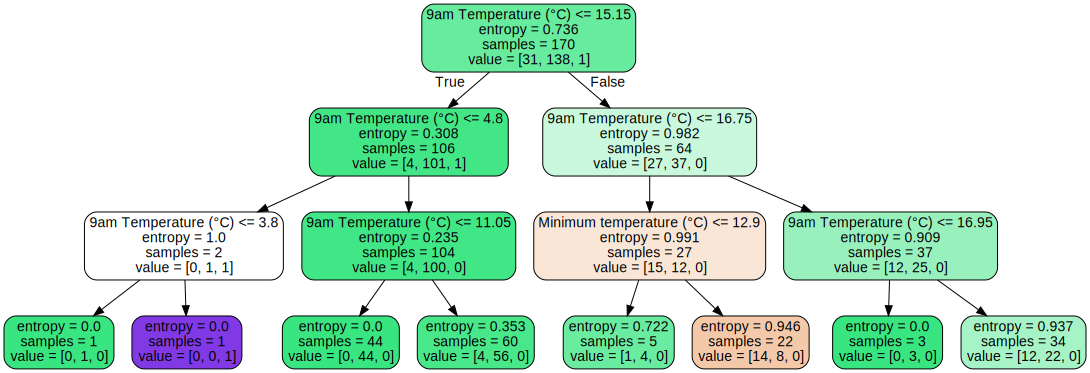

In [24]:
# plot the decision tree

export_graphviz(dt, # the model we trained
                out_file = "mytree.dot", # name of the output file - has to be a .dot file
                feature_names = X.columns, # the names of our features
                filled = True, # formatting: do we want to fill the features with colour
                rounded = True # formatting: do we want rounded edges
               )

# then, open the file using Python
with open("./mytree.dot") as f:
    dot_graph = f.read()

# visualize using graphviz,
graphviz.Source(dot_graph)

#save as png file
#graph = graphviz.Source(dot_graph)   
#graph.format = "png"
#graph.render("Decision tree")